In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_movies = pd.read_csv('movies.csv')
df_movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df_movies.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df_movies['year'].dtypes


dtype('int64')

In [6]:
from scipy.stats import mode

def fill_nullvalues(dataset):
    for column in dataset:
        if dataset[column].dtypes=='object':
            mode_value = mode(dataset[column]).mode[0]
            dataset[column].fillna(mode_value, inplace=True)
        else:
            median_value = np.nanmedian(dataset[column])
            dataset[column].fillna(median_value, inplace=True)
    return dataset

In [7]:
fill_nullvalues(df_movies)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,20205757.0,Universal Pictures,90.0
7664,Dream Round,R,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000.0,20205757.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,20205757.0,Embi Productions,104.0
7666,It's Just Us,R,Drama,2020,"October 1, 2020 (United States)",6.5,33000.0,James Randall,James Randall,Christina Roz,United States,15000.0,20205757.0,Universal Pictures,120.0


In [8]:
df_movies.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [9]:
df_movies['budget'] = df_movies['budget'].astype('int64')
df_movies['gross'] = df_movies['gross'].astype('int64')
df_movies['votes'] = df_movies['votes'].astype('int64')


In [10]:
#released_country=df_movies[df_movies['released'].str.contains('United States')]

In [11]:
#released_country.unique()

In [12]:
for row in df_movies['released']:
    row = row[-16:]
    

In [13]:
df_movies['release_country']=row

In [14]:
df_movies['released']=df_movies['released'].str.replace(row,'',regex=False)

In [15]:
df_movies.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country
7663,More to Life,R,Drama,2020,"October 23, 2020",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,20205757,Universal Pictures,90.0,(United States)
7664,Dream Round,R,Comedy,2020,"February 7, 2020",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,20500000,20205757,Cactus Blue Entertainment,90.0,(United States)
7665,Saving Mbango,R,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,20205757,Embi Productions,104.0,(United States)
7666,It's Just Us,R,Drama,2020,"October 1, 2020",6.5,33000,James Randall,James Randall,Christina Roz,United States,15000,20205757,Universal Pictures,120.0,(United States)
7667,Tee em el,R,Horror,2020,"August 19, 2020",5.7,7,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,20500000,20205757,PK 65 Films,102.0,(United States)


In [16]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7668 non-null   object 
 1   rating           7668 non-null   object 
 2   genre            7668 non-null   object 
 3   year             7668 non-null   int64  
 4   released         7668 non-null   object 
 5   score            7668 non-null   float64
 6   votes            7668 non-null   int64  
 7   director         7668 non-null   object 
 8   writer           7668 non-null   object 
 9   star             7668 non-null   object 
 10  country          7668 non-null   object 
 11  budget           7668 non-null   int64  
 12  gross            7668 non-null   int64  
 13  company          7668 non-null   object 
 14  runtime          7668 non-null   float64
 15  release_country  7668 non-null   object 
dtypes: float64(2), int64(4), object(10)
memory usage: 958.6+ KB


In [21]:
df_movies=df_movies.sort_values(by=['gross'],inplace=False, ascending = False)

In [22]:
df_movies.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country
5445,Avatar,PG-13,Action,2009,"December 18, 2009",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,(United States)
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,(United States)
3045,Titanic,PG-13,Drama,1997,"December 19, 1997",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,(United States)
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,(United States)
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,(United States)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0,(United States)
7625,The Untold Story,R,Comedy,2019,"January 11, 2019",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000,790,Visual Arts Entertainment,104.0,(United States)
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020",5.2,735,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0,(United States)
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,(United States)


Initial assumptions:
    
Budget will be related to gross
Company might be related to gross
relase country might be realted tp gross

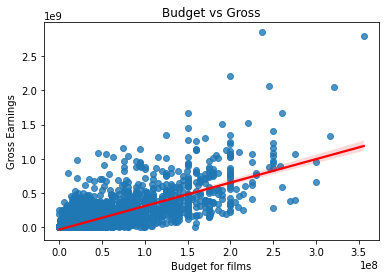

<Figure size 864x576 with 0 Axes>

In [31]:
sns.regplot(x='budget',y='gross',data=df_movies,line_kws={"color":"red"})
plt.xlabel('Budget for films')
plt.ylabel('Gross Earnings')
plt.title('Budget vs Gross')
plt.figure(figsize=(12, 8)) 
plt.show()

In [33]:
df_movies.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.098013,0.222573,0.291690,0.259504,0.120662
score,0.098013,1.000000,0.409157,0.061931,0.185563,0.399407
votes,0.222573,0.409157,1.000000,0.460968,0.632120,0.309151
budget,0.291690,0.061931,0.460968,1.000000,0.745881,0.273371
gross,0.259504,0.185563,0.632120,0.745881,1.000000,0.244380
runtime,0.120662,0.399407,0.309151,0.273371,0.244380,1.000000


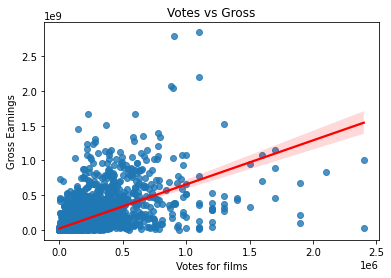

<Figure size 864x576 with 0 Axes>

In [60]:
sns.regplot(x='votes',y='gross',data=df_movies,line_kws={"color":"red"})
plt.xlabel('Votes for films')
plt.ylabel('Gross Earnings')
plt.title('Votes vs Gross')
plt.figure(figsize=(12, 8)) 
plt.show()

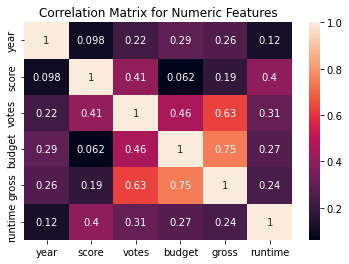

In [35]:
correlation_matrix = df_movies.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')


plt.show()

In [44]:
highest_grossing_company = df_movies.groupby('company')['gross'].mean()
highest_grossing_company.sort_values(ascending = False)[:10]


company
Marvel Studios                1.255466e+09
Illumination Entertainment    1.097122e+09
Fairview Entertainment        9.665549e+08
B24                           8.806815e+08
Avi Arad Productions          8.560852e+08
Chris Morgan Productions      7.590569e+08
Jolie Pas                     7.584118e+08
Coco Cartoon                  7.262641e+08
Lucasfilm                     7.185352e+08
Marvel Entertainment          7.144215e+08
Name: gross, dtype: float64

In [46]:
genre = df_movies.groupby('genre')['gross'].mean()
genre.sort_values(ascending = False)

genre
Animation    2.372860e+08
Family       1.961725e+08
Action       1.431569e+08
Adventure    1.078643e+08
Mystery      1.011835e+08
Biography    4.724975e+07
Horror       4.610688e+07
Comedy       4.376230e+07
Crime        3.908766e+07
Drama        3.831419e+07
Fantasy      3.828879e+07
Sci-Fi       3.009014e+07
Thriller     2.525288e+07
Romance      2.288065e+07
History      2.020576e+07
Western      1.067530e+07
Musical      2.595346e+06
Sport        1.067629e+06
Music        1.100140e+05
Name: gross, dtype: float64

In [53]:
country_budget = df_movies.groupby('country')['budget'].mean()
country_budget.sort_values(ascending = False)[:10]

country
Malta                   5.500000e+07
China                   5.333500e+07
Finland                 5.283333e+07
New Zealand             5.054400e+07
United Arab Emirates    3.900000e+07
Czech Republic          3.618750e+07
Libya                   3.500000e+07
Germany                 3.472009e+07
United States           3.363263e+07
South Africa            3.137500e+07
Name: budget, dtype: float64

In [54]:
country_revenue = df_movies.groupby('country')['gross'].mean()
country_revenue.sort_values(ascending = False)[:10]

country
Malta                   3.527941e+08
New Zealand             2.549975e+08
China                   2.197357e+08
Finland                 1.691938e+08
United States           8.862347e+07
United Arab Emirates    8.858613e+07
South Africa            7.342421e+07
Lebanon                 6.441700e+07
United Kingdom          6.043370e+07
Germany                 5.332305e+07
Name: gross, dtype: float64

 (United States)    7668
Name: release_country, dtype: int64